### Seaborn 

Seaborn was built primarily for statistical analysis. It is built on Matplotlib

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
immigration_df = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                            sheet_name='Canada by Citizenship',
                            skiprows=range(20),
                            skipfooter=2)

In [3]:
df = immigration_df.copy()

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace = True)

# add total column
df['Total'] =  df.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df.shape)

data dimensions: (195, 38)


In [6]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df_reg = df.loc[['Afghanistan', 'Albania', 'Andorra'], years].T

In [8]:
df_reg.head()

Country,Afghanistan,Albania,Andorra
1980,16,1,0
1981,39,0,0
1982,39,0,0
1983,47,0,0
1984,71,0,0


In [9]:
df_reg = pd.DataFrame(df_reg.sum(axis = 1))

In [10]:
df_reg.reset_index(inplace = True)

In [11]:
df_reg.columns = ['Year', 'Total']

In [12]:
df_reg['Year'] = df_reg['Year'].astype(int)

Regression Plot

In [13]:
df_reg.shape

(34, 2)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Linear Regression')

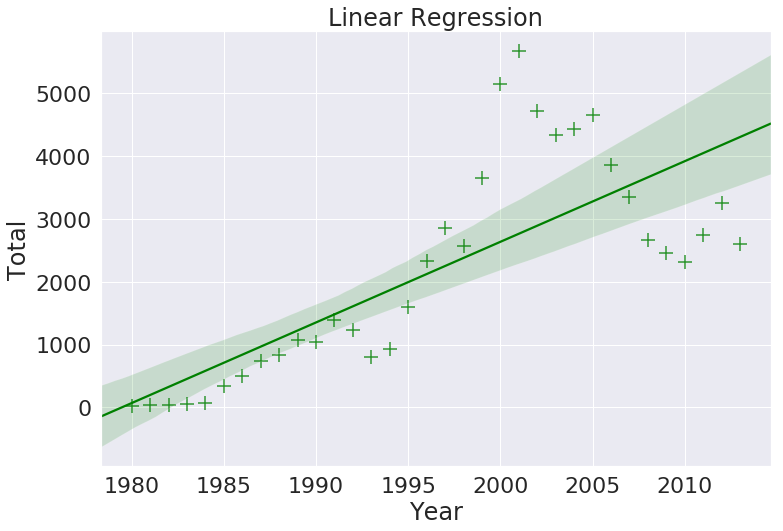

In [14]:
### type your answer here
plt.figure(figsize = (12,8))

sns.set_style('ticks')
sns.set(font_scale = 2)

ax = sns.regplot(x = 'Year', y = 'Total', data = df_reg, color = 'green', marker = '+', 
                scatter_kws = {'s': 200})

ax.set(xlabel = "Year", ylabel = "Total")
ax.set_title("Linear Regression")

Correlation Matrix

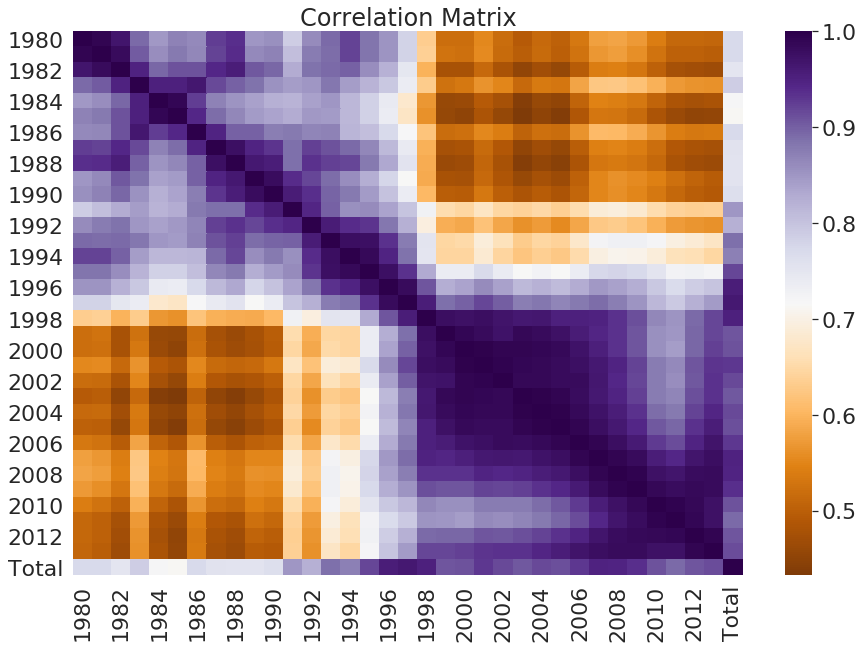

In [16]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, cmap = 'PuOr', cbar=True)
plt.title("Correlation Matrix")
plt.show()

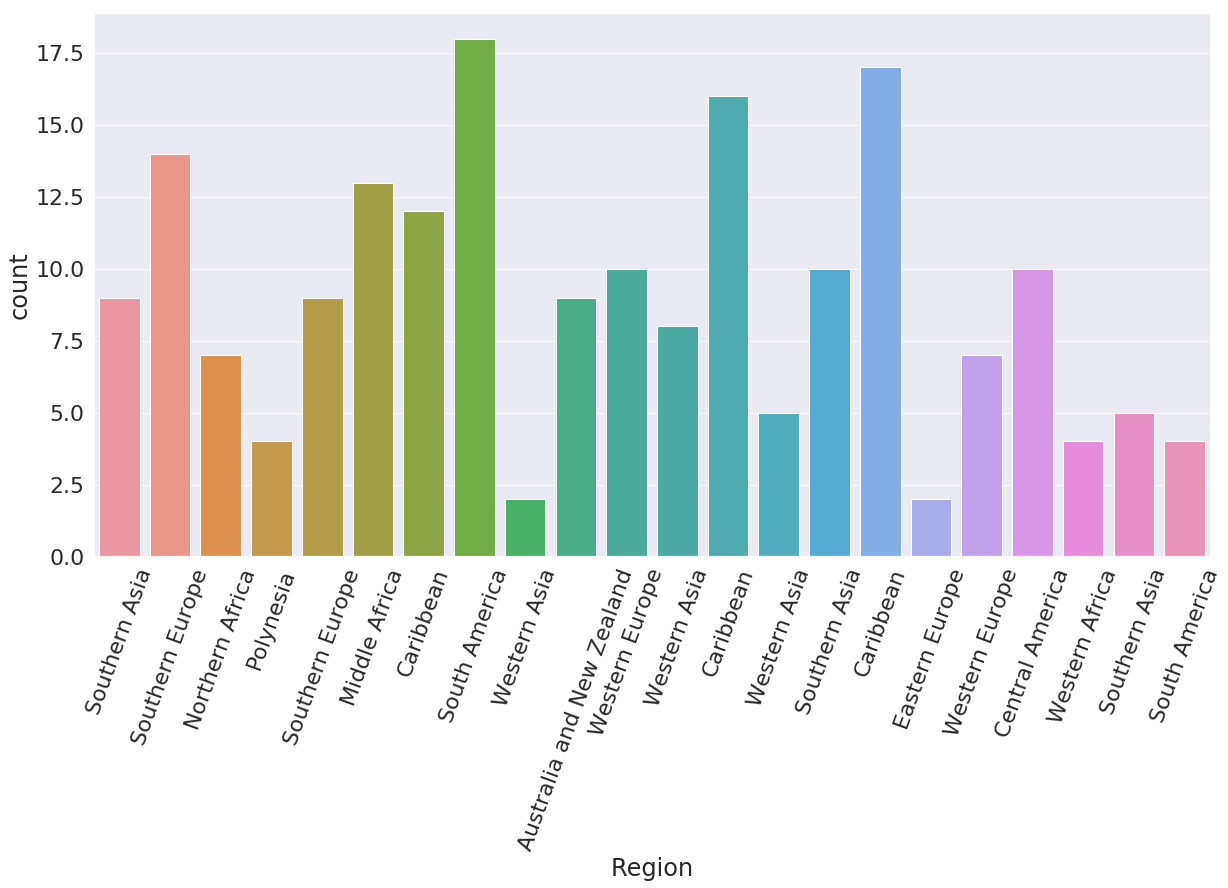

In [26]:
plt.figure(figsize = (20,10))
cplot = sns.countplot(data = df, x = 'Region')
#Rotate x labels so they can be seen
cplot.set_xticklabels(df['Region'], rotation = 70)
plt.show()